## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [92]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
# spam_data.describe()
#spam_data.info()

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [93]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [94]:
spam_data.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

In [95]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [96]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [8]:
spam_data['capital_run_length_average'].value_counts()

1.000    349
2.000     79
1.800     55
1.500     37
1.666     36
1.250     27
2.333     25
1.333     25
3.000     24
3.333     22
1.750     19
1.428     19
1.600     18
1.166     18
2.500     17
...
3.367     1
2.721     1
2.779     1
2.966     1
2.455     1
1.912     1
2.546     1
1.834     1
12.200    1
25.964    1
4.924     1
1.243     1
1.309     1
7.170     1
2.396     1
Length: 2161, dtype: int64

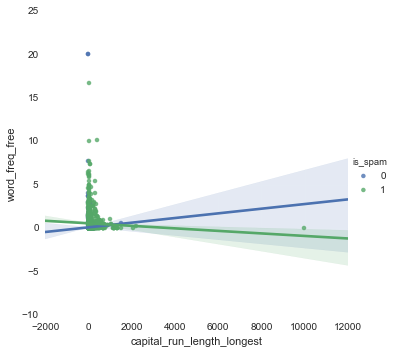

In [9]:
sns.lmplot("capital_run_length_longest", "word_freq_free", spam_data, hue="is_spam")

In [10]:
# visualize here
spam_small = spam_data[["capital_run_length_average",
                        "capital_run_length_longest", 
                        "capital_run_length_total"]]

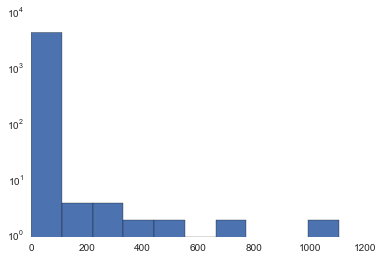

In [11]:
spam_small.capital_run_length_average.hist(log=True)

(array([ 1928.,  1697.,   706.,   174.,    47.,    19.,    14.,     5.,
            6.,     5.]),
 array([ 0.        ,  0.70053356,  1.40106712,  2.10160068,  2.80213424,
         3.5026678 ,  4.20320136,  4.90373493,  5.60426849,  6.30480205,
         7.00533561]),
 <a list of 10 Patch objects>)

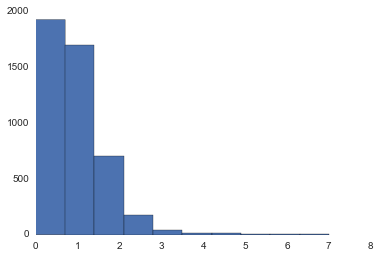

In [12]:
plt.hist(np.log(spam_small.capital_run_length_average))

In [13]:
spam_data_subset = spam_data.ix[:,:5]
spam_data_subset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our
0,0.00,0.64,0.64,0,0.32
1,0.21,0.28,0.50,0,0.14
2,0.06,0.00,0.71,0,1.23
3,0.00,0.00,0.00,0,0.63
4,0.00,0.00,0.00,0,0.63
5,0.00,0.00,0.00,0,1.85
6,0.00,0.00,0.00,0,1.92
7,0.00,0.00,0.00,0,1.88
8,0.15,0.00,0.46,0,0.61
9,0.06,0.12,0.77,0,0.19


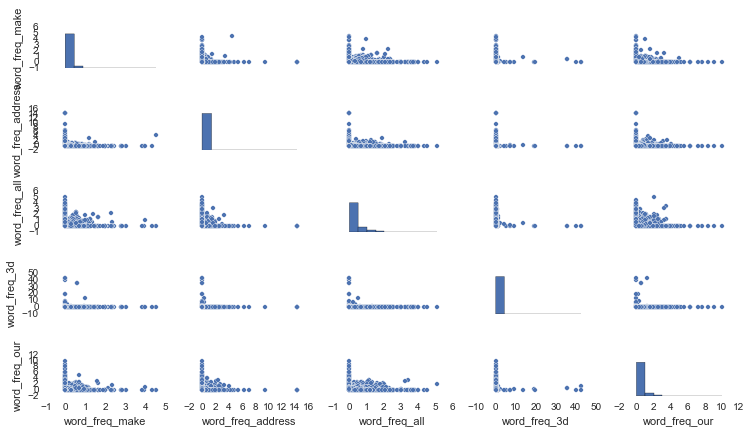

In [14]:
sns.pairplot(spam_data_subset, size = 1.2, aspect=1.75)

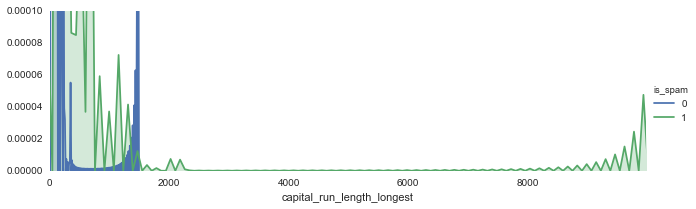

In [380]:
fg = sns.FacetGrid(spam_data, hue="is_spam", aspect=3)
fg.map(sns.kdeplot, "capital_run_length_longest", shade=True)
fg.set(xlim=(spam_data.capital_run_length_longest.min(), spam_data.capital_run_length_longest.max()))
fg.set(ylim=(0,0.0001))
fg.add_legend()

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [15]:
# create subset of dataframe, and then run a logistic regression on it

In [251]:
from sklearn import linear_model

In [252]:
features = spam_data.iloc[:,-3:-2]
target = spam_data['is_spam']
x = features.values
y = features.values

In [260]:
logit = linear_model.LogisticRegression(C=1).fit(x,y)
logit.score(x,y)

/Users/isabel/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18495979134970658

In [263]:
spam_logit = spam_data[['capital_run_length_longest', 'is_spam']]
spam_logit.head()

,capital_run_length_longest,is_spam
0,61,1
1,101,1
2,485,1
3,40,1
4,40,1


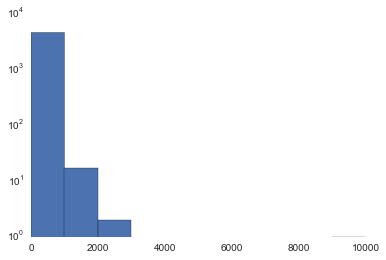

In [264]:
spam_data.capital_run_length_longest.hist(log = 2)

In [265]:
train_cols = spam_small.columns[:]
print train_cols

Index([u'capital_run_length_average', u'capital_run_length_longest', u'capital_run_length_total'], dtype='object')


In [266]:
logit = smf.Logit(spam_data["is_spam"], spam_data[train_cols])
print logit

In [267]:
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.658090
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4598
Method:                           MLE   Df Model:                            2
Date:                Sat, 14 Mar 2015   Pseudo R-squ.:                 0.01854
Time:                        16:26:38   Log-Likelihood:                -3027.9
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                 1.432e-25
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
capital_run_length_average    -0.0181      0.002     -7.483      0.000        -0.023    -0.013
capital_run_length_longest     0.0102      0.001     10.681      0.000         0.008     0.012
capital_run_length_total      -0.0002   7.45e-05     -2.669      0.008        -0.000 -5.28e-05
==============================================================================================
"""

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [268]:
feature_col = [col for col in spam_data.columns if col!= 'is_spam']
feature_col = spam_data[feature_col]

In [269]:
target_col = spam_data['is_spam']

In [270]:
X = feature_col.values
y = target_col.values

In [271]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [272]:
logit = LogisticRegression(C=1).fit(X_train, y_train)
logit.score(X_test,y_test)

0.93265749456915281

In [ ]:
# logistic regression run on whole feature set is more accurate than the model built on a single column

#### Exercise 4: Use crossvalidation to score model

In [369]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, scoring='precision', cv=10)
print scores
print scores.mean()

[ 0.95180723  0.93491124  0.90909091  0.93333333  0.91666667  0.89528796
  0.9760479   0.93220339  0.78282828  0.83236994]
0.906454685777


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [370]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [371]:
clf.score(X_test, y_test)

0.78276611151339603

In [278]:
# Logistic Regression is more accurate at ~93% accuracy

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=3, whiten=True)

In [188]:
pca.components_

array([[  7.29618966e-08,  -7.55892972e-08,   9.88736967e-08,
          8.12984502e-08,   9.22209989e-09,   6.14865374e-08,
         -5.20105218e-09,   4.38025193e-08,   1.86389095e-07,
          1.54653263e-07,   6.23432185e-08,   4.72810637e-08,
          8.35367059e-08,   1.49428705e-07,   1.09060911e-07,
          9.45108541e-09,   7.75984832e-08,   6.91283571e-08,
         -3.19994862e-08,   1.06821504e-07,   1.74915563e-07,
          2.79519169e-07,   1.56187959e-07,   9.53875453e-08,
         -1.98709447e-07,  -1.42972493e-07,  -8.65529236e-07,
         -9.69679759e-08,  -8.96793344e-08,  -7.81319798e-08,
         -4.94044670e-08,  -4.09940095e-08,   7.94434655e-09,
         -3.90253442e-08,  -6.54489911e-08,  -4.97688728e-08,
         -5.76368029e-09,  -8.21442060e-09,  -5.70881140e-08,
         -2.62833755e-08,  -2.57991889e-08,  -1.15657698e-07,
         -2.16656831e-08,  -6.75872689e-08,  -2.56797644e-07,
         -1.13392709e-07,   9.09340941e-10,  -8.07665456e-09,
        

In [280]:
pca.explained_variance_ratio_

array([ 0.92702701,  0.07104297,  0.00184372])

In [281]:
pca.explained_variance_ratio_.sum()

0.99991370945857239

In [282]:
X_pca = pca.transform(X)

In [283]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([-0.,  0., -0.])

In [284]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.,  1.])

In [285]:
np.corrcoef(X_pca.T)

array([[  1.00000000e+00,   4.62138478e-16,   3.16151751e-16],
       [  4.62138478e-16,   1.00000000e+00,   1.57050349e-15],
       [  3.16151751e-16,   1.57050349e-15,   1.00000000e+00]])

In [286]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

In [287]:
pca_components = len(pca.explained_variance_ratio_)

<Container object of 3 artists>

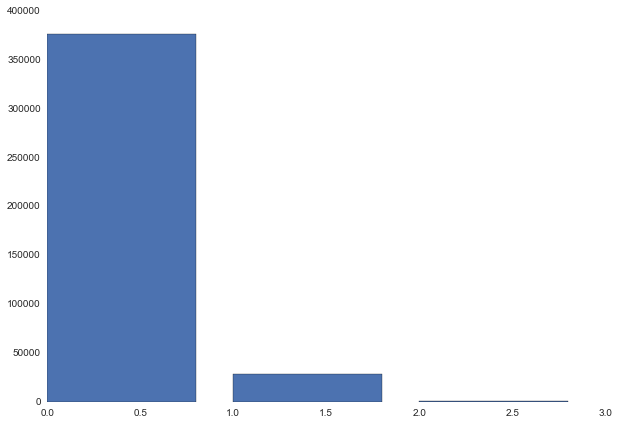

In [288]:
plt.figure(figsize=(10, 7))
plt.bar(range(pca_components), pca.explained_variance_)

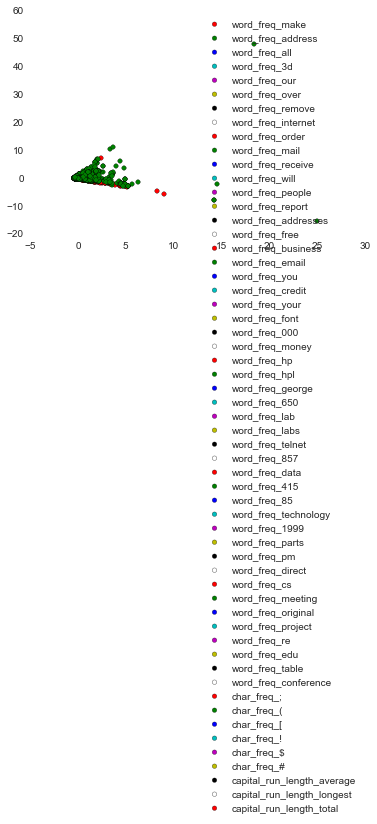

In [289]:
plot_PCA_2D(X_pca, y, feature_cols)

In [290]:
from sklearn.linear_model import LogisticRegression

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [291]:
def plot_roc_curve(target_test, target_predicted_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    

In [294]:
categories = ['Spam', 'Not Spam']

In [295]:
logistic = logit.predict(X_test)

In [298]:
target_predicted_proba = logit.predict_proba(X_test)

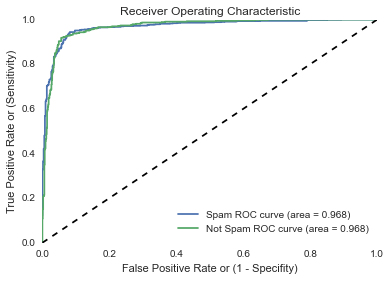

In [299]:
plot_roc_curve(y_test, target_predicted_proba, categories)

In [ ]:
# YAY!

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [303]:
target_predicted_proba

array([[  2.03775238e-05,   9.99979622e-01],
       [  9.98244919e-01,   1.75508107e-03],
       [  1.00000000e+00,   1.19201704e-23],
       ..., 
       [  3.83462478e-03,   9.96165375e-01],
       [  4.83437307e-03,   9.95165627e-01],
       [  9.99958503e-01,   4.14966082e-05]])

In [337]:
output_higher = []
output_default = []

In [338]:
# function for threshold above .8
for i in range(len(target_predicted_proba)):
    if target_predicted_proba[i][0] > 0.8:
        output_higher.append(1)
        print "Spam"
    else:
        output_higher.append(0)
        print "Not Spam"

Not Spam
Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Not Spam
Spa

In [341]:
# function for default threshold of 0.5

for i in range(len(target_predicted_proba)):
    if target_predicted_proba[i][0] > 0.5:
        output_default.append(1)
        print "Spam"
    else:
        output_default.append(0)
        print "Not Spam"

Not Spam
Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Not Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Not Spam
Not Spam
Spam
Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Spam
Not Spam
Spam
Not Spam
Spam
Not Spam
Not Spam
Spam
Spam
Sp

In [363]:
print "Proportion of Spam emails classified w model at 80% threshold:", 
float(sum(output_higher)) / len(output_higher)

Proportion of Spam emails classified w model at 80% threshold:

0.5242577842143374

In [364]:
print "Proportion of Spam emails classified w model at default 50% threshold", 
float(sum(output_default)) / len(output_default)

Proportion of Spam emails classified w model at default 50% threshold

0.6256335988414192

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [373]:
# Changing the threshold is a tradeoff of specificity vs. sensitivity. 
# That is, a model with a higher threshold will classify fewer spam email
# With a higher threshold, our model is much more conservative in its classification of "
" an email as Spam. It will be more sure that the ones that. But ", 
we'll get fewer spams and be more confident that they are all spams vs. a model with a lower threshold 

With a higher threshold, our model is much more conservative in its classification of 


' an email as Spam'

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [11]:
#your code here

In [12]:
#your visualization here